In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
import shutil
import glob
import zipfile

In [4]:
ROOT_DIR = 'D:/project/Sem 5/Minor/PCOS1/PCOS'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
   number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
   print("",dir,"" ,number_of_images[dir])




 infected  16
 notinfected  16


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input


In [6]:
def preprocessingImage1(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function= preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [7]:
def preprocessionfImage2(path):
  """
  Input :path
  Output : preprocessed Image
  """
  image_data  = ImageDataGenerator(preprocessing_function= preprocess_input )
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

  


We will split the data such that 
70% for training 
15 % for vailadation
15 % for testing 



In [11]:
def datafolder(path,split):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size=(math.floor(split * number_of_images[dir])-5),replace=False):
      
          O = os.path.join(ROOT_DIR,dir,img)
          D = os.path.join("./"+path,dir)
          shutil.copy(O,D)
          os.remove(O)

  else:
     print("Folder already exist")


In [12]:
datafolder("train",0.7)

Folder already exist


In [13]:
datafolder("test",0.15)

Folder already exist


In [15]:
datafolder("val",0.15)

Folder already exist


In [17]:
path ='D:/project/Sem 5/Minor/PCOS1/train'
train_data = preprocessingImage1(path)

Found 1336 images belonging to 2 classes.


In [18]:
path ='D:/project/Sem 5/Minor/PCOS1/test'
test_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.


In [19]:
path = 'D:/project/Sem 5/Minor/PCOS1/val'
val_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.




Model Block




In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet
import keras

In [21]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)

In [23]:
for layer in base_model.layers:
  layer.trainable = False

In [24]:
x= Flatten()(base_model.output)
x= Dense(units=1,activation='sigmoid')(x)

In [25]:
model = Model(base_model.input,x)

In [26]:
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [27]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc = ModelCheckpoint(filepath="bestmodel.keras", monitor='val_accuracy', verbose=1, save_best_only=True)

#Early check points
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1)

cb = [mc,es]

In [28]:
hist = model.fit(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=16,
                          callbacks=cb)

Epoch 1/30


c:\Users\Vedant\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - accuracy: 0.7965 - loss: 5.8058
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to bestmodel.keras


c:\Users\Vedant\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8062 - loss: 5.5512 - val_accuracy: 1.0000 - val_loss: 6.9065e-04
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 1.0000 - loss: 0.0075
Epoch 2: val_accuracy did not improve from 1.00000
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 3.3901e-05
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 1.0000 - loss: 1.3224e-04
Epoch 3: val_accuracy did not improve from 1.00000
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 1.3622e-04 - val_accuracy: 1.0000 - val_loss: 2.2273e-05
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 1.0000 - loss: 1.0025e-04
Epoch 4: val_accuracy did not improve from 1.00000
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 905ms/step - accuracy: 1.0000 - loss: 9.7237e-05 - val_accuracy: 1.0000 - val_loss: 2.2012e-05
Epoch 5/30
 2/10 ━━━━━━━━━━━━━━━━━━━━ 2s 339ms/step - accuracy: 1.0000 - loss: 1.6839e-06
Epoch

In [30]:
model = load_model("D:/project/Sem 5/Minor/PCOS1/bestmodel.keras")

In [31]:
acc = model.evaluate(test_data)[1]
print(f"our model accuracy is  {acc * 100} %")

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 546ms/step - accuracy: 1.0000 - loss: 4.7855e-05
our model accuracy is  100.0 %


 Our model is perform well on the datasets.

The accuracy is 100.0 %

In [32]:
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [33]:
train_data.class_indices

{'infected': 0, 'notinfected': 1}

In [34]:
test_data.class_indices

{'infected': 0, 'notinfected': 1}

In [35]:
val_data.class_indices

{'infected': 0, 'notinfected': 1}

In [36]:
#now get some random images and predict the class
from keras.preprocessing import image
import tensorflow as tf

def predictimage(path):
    img = tf.keras.utils.load_img(path, target_size=(224, 224))
    i = tf.keras.utils.img_to_array(img) / 255.0
    input_arr = np.array([i])

    # Make prediction
    pred = model.predict(input_arr)[0][0]  # Get single output value
    
    # Determine label based on prediction
    label = "Not Affected" if pred >= 0.5 else "Affected"  # assuming 0.5 threshold for binary classification
    print(f"Prediction: {label}, Confidence: {pred:.2f}")

    # Display image with label
    plt.imshow(input_arr[0])
    plt.title(f"Input Image - {label}")
    plt.show()
    
    return label, pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
Prediction: Affected, Confidence: 0.00


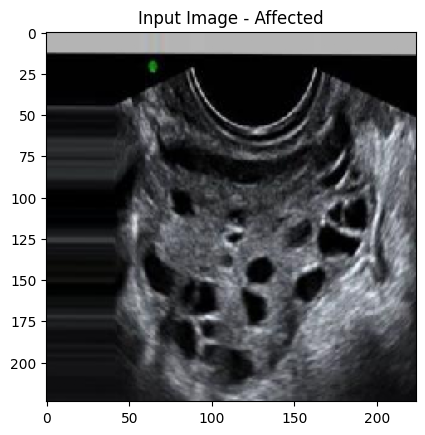

In [38]:
#It is the infected image sample
label, pred = predictimage("D:/project/Sem 5/Minor/PCOS1/test/infected/img_0_1560.jpg") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: Affected, Confidence: 0.00


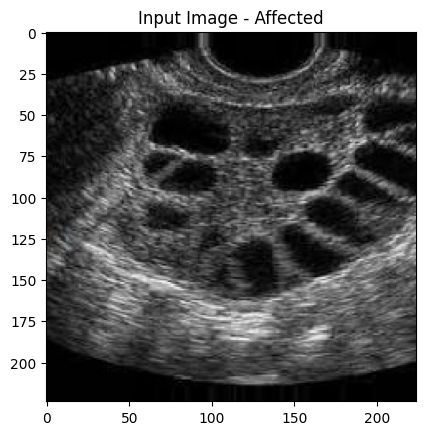

In [41]:
#It is the not affected sample images
label, pred = predictimage("D:/project/Sem 5/Minor/PCOS/code 2.0/testing/pcos/img_0_113.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction: Not Affected, Confidence: 1.00


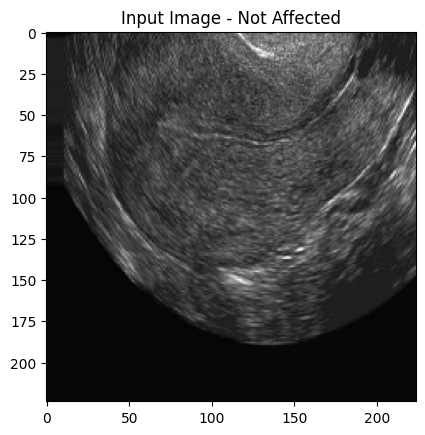

In [42]:
#not infected image

label, pred = predictimage("D:/project/Sem 5/Minor/PCOS1/test/notinfected/img_0_858.jpg")


In [44]:
# predictimage("D:/Minor/PCOS1/test/notinfected/img_0_840.jpg")

In [45]:
# import the necessary packages
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model

import tensorflow as tf

import numpy as np
import imutils
import cv2
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [46]:
# initialize our 'gradient class activation map and build the heatmap
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = load_img("D:/Minor/PCOS/code 2.0/testing/pcos/img_0_113.jpg", target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)



cam = GradCAM(model, classIdx=0)
heatmap = cam.compute_heatmap(image)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Minor/PCOS/code 2.0/testing/pcos/img_0_113.jpg'

In [ ]:
# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread("D:/Minor/PCOS/code 2.0/testing/pcos/img_0_113.jpg")
# resized = cv2.resize(orig, (224, 224))

In [ ]:
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

In [ ]:
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])
output = imutils.resize(output, height=700)
cv2.imshow("Output", output)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
